In [101]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random 

In [102]:
import tensorflow as tf
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from sklearn.metrics import mean_squared_error, r2_score
import keras_tuner as kt

In [103]:
model = load_model("models\LSTM_multivariate_unvac.keras")
model_vac = load_model("models\LSTM_multivariate_vac.keras")

<>:1: SyntaxWarning: invalid escape sequence '\L'
<>:2: SyntaxWarning: invalid escape sequence '\L'
<>:1: SyntaxWarning: invalid escape sequence '\L'
<>:2: SyntaxWarning: invalid escape sequence '\L'
C:\Users\dangn\AppData\Local\Temp\ipykernel_25284\1526455321.py:1: SyntaxWarning: invalid escape sequence '\L'
  model = load_model("models\LSTM_multivariate_unvac.keras")
C:\Users\dangn\AppData\Local\Temp\ipykernel_25284\1526455321.py:2: SyntaxWarning: invalid escape sequence '\L'
  model_vac = load_model("models\LSTM_multivariate_vac.keras")


In [104]:
df = pd.read_csv("datasets\covid19postvaxstatewidestats.csv")

df = df[df['unvaccinated_cases_per_100k'].notna()]

df = df.reset_index(drop=True)

<>:1: SyntaxWarning: invalid escape sequence '\c'
<>:1: SyntaxWarning: invalid escape sequence '\c'
C:\Users\dangn\AppData\Local\Temp\ipykernel_25284\2108600221.py:1: SyntaxWarning: invalid escape sequence '\c'
  df = pd.read_csv("datasets\covid19postvaxstatewidestats.csv")


In [105]:
df['date'] = pd.to_datetime(df['date'], format = "%Y-%m-%d")

In [106]:
df_unvac = df[['unvaccinated_cases_per_100k', 'unvaccinated_hosp_per_100k', 'unvaccinated_deaths_per_100k']]

df_vac = df[['vaccinated_cases_per_100k', 'vaccinated_hosp_per_100k', 'vaccinated_deaths_per_100k']]

df_unvac

,unvaccinated_cases_per_100k,unvaccinated_hosp_per_100k,unvaccinated_deaths_per_100k
0,27.251295,1.483401,0.067702
1,25.072362,1.360519,0.078033
2,23.268146,1.296892,0.087677
3,21.766329,1.236441,0.099877
4,20.467271,1.179528,0.112219
...,...,...,...
778,8.425650,0.613146,0.051096
779,8.210084,0.564715,0.048550
780,8.268116,0.552060,0.048561
781,8.157356,0.570069,0.061353


In [107]:
df_vac

,vaccinated_cases_per_100k,vaccinated_hosp_per_100k,vaccinated_deaths_per_100k
0,3.805800,0.092076,0.000000
1,3.546032,0.085105,0.000000
2,3.120234,0.078661,0.000000
3,2.991090,0.072953,0.000000
4,3.109945,0.091469,0.000000
...,...,...,...
778,3.002135,0.266944,0.027189
779,2.952661,0.251122,0.029166
780,2.931858,0.250130,0.029660
781,2.942200,0.241723,0.029659


In [108]:
forecast_unvac = df_unvac[-10:].values

forecast_unvac = forecast_unvac.reshape((1,10,3))

forecast_unvac.shape

(1, 10, 3)

In [109]:
forecast_vac = df_vac[-10:].values

forecast_vac = forecast_vac.reshape((1,10,3))

forecast_vac.shape

(1, 10, 3)

In [110]:
forecast = 30

In [111]:
predictions_unvac = []
predictions_vac = []

for i in range(forecast):
    next_unvac = model.predict(forecast_unvac)
    next_vac = model_vac.predict(forecast_vac)

    next_unvac = next_unvac.reshape((1,1,3))
    next_vac = next_vac.reshape((1,1,3))

    forecast_unvac = np.append(forecast_unvac[:, 1:, :], next_unvac, axis = 1)
    forecast_vac = np.append(forecast_vac[:, 1:, :], next_vac, axis = 1)


    predictions_unvac.append(next_unvac[0, -1, 0])
    predictions_vac.append(next_vac[0, -1, 0])


predictions_unvac = np.array(predictions_unvac)
predictions_vac = np.array(predictions_vac)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
1/1 ━━━━━━━━━━━

In [112]:
last_df = df[['date', 'unvaccinated_cases_per_100k']]

last_df = last_df[last_df['unvaccinated_cases_per_100k'].notnull()]

last_df

,date,unvaccinated_cases_per_100k
0,2021-02-07,27.251295
1,2021-02-08,25.072362
2,2021-02-09,23.268146
3,2021-02-10,21.766329
4,2021-02-11,20.467271
...,...,...
778,2023-03-27,8.425650
779,2023-03-28,8.210084
780,2023-03-29,8.268116
781,2023-03-30,8.157356


In [113]:
last_date = last_df['date'].iloc[-1]

last_date

next_month = pd.date_range(start = last_date, periods = 31, closed = 'right')

next_month

C:\Users\dangn\AppData\Local\Temp\ipykernel_25284\3089131202.py:5: FutureWarning: Argument `closed` is deprecated in favor of `inclusive`.
  next_month = pd.date_range(start = last_date, periods = 31, closed = 'right')


DatetimeIndex(['2023-04-01', '2023-04-02', '2023-04-03', '2023-04-04',
               '2023-04-05', '2023-04-06', '2023-04-07', '2023-04-08',
               '2023-04-09', '2023-04-10', '2023-04-11', '2023-04-12',
               '2023-04-13', '2023-04-14', '2023-04-15', '2023-04-16',
               '2023-04-17', '2023-04-18', '2023-04-19', '2023-04-20',
               '2023-04-21', '2023-04-22', '2023-04-23', '2023-04-24',
               '2023-04-25', '2023-04-26', '2023-04-27', '2023-04-28',
               '2023-04-29', '2023-04-30'],
              dtype='datetime64[ns]', freq='D')

(array([19448., 19452., 19456., 19460., 19464., 19468., 19472., 19476.,
        19478.]),
 [Text(19448.0, 0, '2023-04-01'),
  Text(19452.0, 0, '2023-04-05'),
  Text(19456.0, 0, '2023-04-09'),
  Text(19460.0, 0, '2023-04-13'),
  Text(19464.0, 0, '2023-04-17'),
  Text(19468.0, 0, '2023-04-21'),
  Text(19472.0, 0, '2023-04-25'),
  Text(19476.0, 0, '2023-04-29'),
  Text(19478.0, 0, '2023-05-01')])

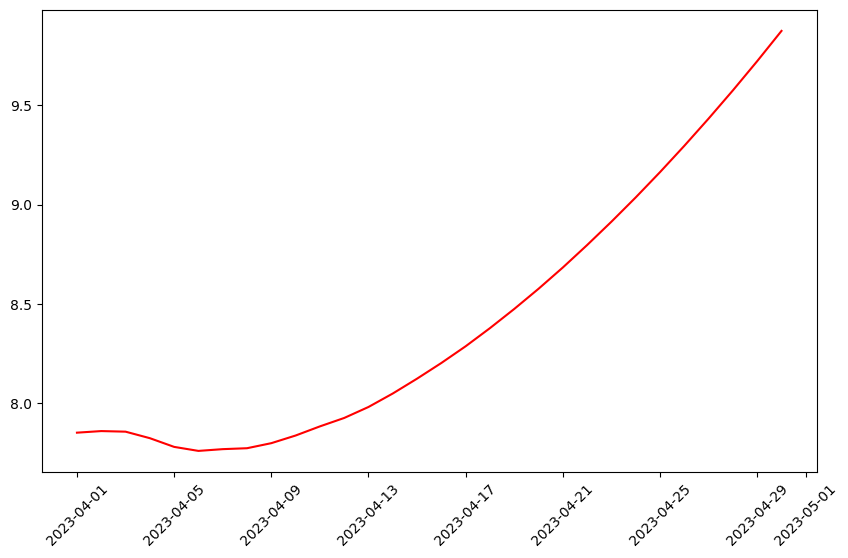

In [114]:
plt.figure(figsize=(10,6))
plt.plot(next_month, predictions_unvac, color = "r")
plt.xticks(rotation = 45)

(array([19448., 19452., 19456., 19460., 19464., 19468., 19472., 19476.,
        19478.]),
 [Text(19448.0, 0, '2023-04-01'),
  Text(19452.0, 0, '2023-04-05'),
  Text(19456.0, 0, '2023-04-09'),
  Text(19460.0, 0, '2023-04-13'),
  Text(19464.0, 0, '2023-04-17'),
  Text(19468.0, 0, '2023-04-21'),
  Text(19472.0, 0, '2023-04-25'),
  Text(19476.0, 0, '2023-04-29'),
  Text(19478.0, 0, '2023-05-01')])

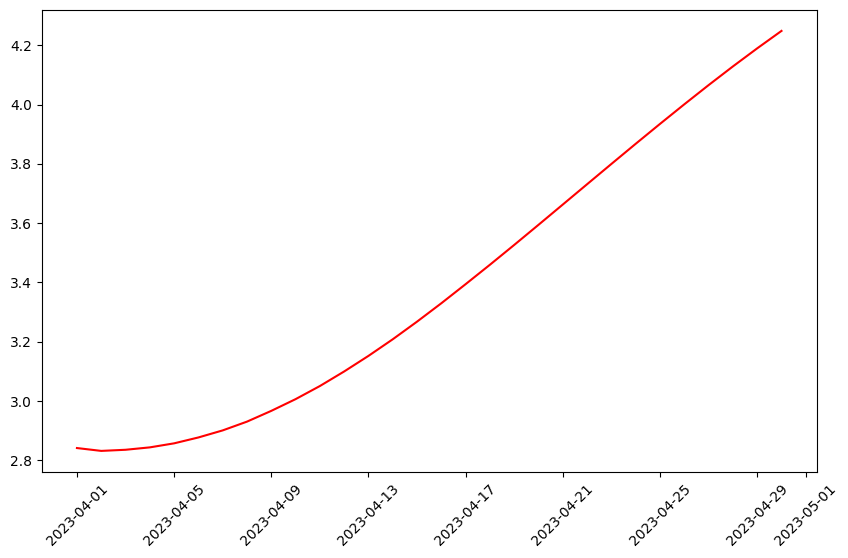

In [115]:
plt.figure(figsize=(10,6))
plt.plot(next_month, predictions_vac, color = "r")
plt.xticks(rotation = 45)

In [116]:
df_predictions = pd.DataFrame({
    'date': next_month,
    'unvaccinated_cases_per_100k': predictions_unvac   
})

df_predictions

,date,unvaccinated_cases_per_100k
0,2023-04-01,7.851430
1,2023-04-02,7.859461
2,2023-04-03,7.856500
3,2023-04-04,7.823679
4,2023-04-05,7.779814
5,2023-04-06,7.759596
6,2023-04-07,7.768405
7,2023-04-08,7.773068
8,2023-04-09,7.798546
9,2023-04-10,7.837054


In [117]:
df_predictions_vac = pd.DataFrame({
    'date': next_month,
    'vaccinated_cases_per_100k': predictions_vac   
})

df_predictions_vac

,date,vaccinated_cases_per_100k
0,2023-04-01,2.841235
1,2023-04-02,2.831603
2,2023-04-03,2.835392
3,2023-04-04,2.843497
4,2023-04-05,2.857106
5,2023-04-06,2.876955
6,2023-04-07,2.900774
7,2023-04-08,2.930372
8,2023-04-09,2.966681
9,2023-04-10,3.006214


In [118]:
date_index = df[df['date'] == '2023-01-01'].index[0]

print(date_index)

df_forecast = df[date_index:]

df_forecast

693


,date,area,area_type,unvaccinated_cases,vaccinated_cases,unvaccinated_hosp,vaccinated_hosp,unvaccinated_deaths,vaccinated_deaths,population_unvaccinated,population_vaccinated,unvaccinated_cases_per_100k,vaccinated_cases_per_100k,unvaccinated_hosp_per_100k,vaccinated_hosp_per_100k,unvaccinated_deaths_per_100k,vaccinated_deaths_per_100k
693,2023-01-01,California,State,825,1696,110,243,13,29,5734463,28862182,35.599298,14.528651,2.663097,0.973097,0.331330,0.109882
694,2023-01-02,California,State,1673,3522,115,228,16,24,5730657,28862788,34.364048,13.950241,2.512801,0.935461,0.314100,0.107900
695,2023-01-03,California,State,2328,4568,150,270,19,29,5726933,28863461,32.540479,13.186717,2.442095,0.908217,0.304326,0.103938
696,2023-01-04,California,State,1912,3509,130,233,0,33,5723196,28864177,30.492453,12.238601,2.341349,0.873549,0.244619,0.107894
697,2023-01-05,California,State,1517,3096,130,242,19,36,5719693,28864783,28.537995,11.387579,2.267854,0.853734,0.252261,0.109872
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
778,2023-03-27,California,State,607,1016,33,83,4,7,5591769,28898483,8.425650,3.002135,0.613146,0.266944,0.051096,0.027189
779,2023-03-28,California,State,502,980,28,74,3,9,5590686,28898869,8.210084,2.952661,0.564715,0.251122,0.048550,0.029166
780,2023-03-29,California,State,539,924,37,81,3,7,5589458,28899278,8.268116,2.931858,0.552060,0.250130,0.048561,0.029660
781,2023-03-30,California,State,481,961,38,65,5,9,5588295,28899658,8.157356,2.942200,0.570069,0.241723,0.061353,0.029659


In [119]:
df_unvac = df_forecast[['date', 'unvaccinated_cases_per_100k']]
df_vac = df_forecast[['date', 'vaccinated_cases_per_100k']]

df_unvac

,date,unvaccinated_cases_per_100k
693,2023-01-01,35.599298
694,2023-01-02,34.364048
695,2023-01-03,32.540479
696,2023-01-04,30.492453
697,2023-01-05,28.537995
...,...,...
778,2023-03-27,8.425650
779,2023-03-28,8.210084
780,2023-03-29,8.268116
781,2023-03-30,8.157356


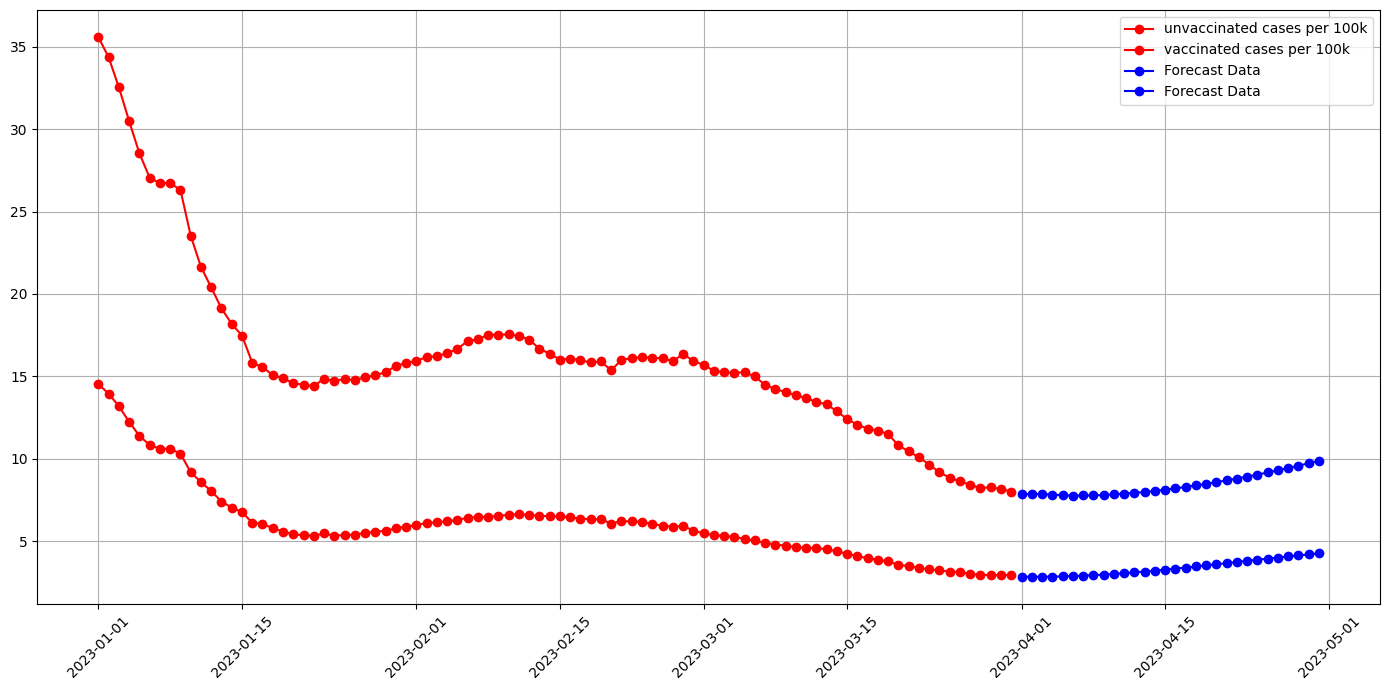

In [120]:
plt.figure(figsize=(14, 7))


plt.plot(df_forecast['date'], df_unvac['unvaccinated_cases_per_100k'], label='unvaccinated cases per 100k', color='r', marker='o')

plt.plot(df_forecast['date'], df_vac['vaccinated_cases_per_100k'], label='vaccinated cases per 100k', color='r', marker='o')
plt.plot(df_predictions['date'], df_predictions_vac['vaccinated_cases_per_100k'], label='Forecast Data', color='b', marker='o')
plt.plot(df_predictions['date'], df_predictions['unvaccinated_cases_per_100k'], label='Forecast Data', color='b', marker='o')

plt.xticks(rotation = 45)

plt.grid(True)

plt.legend()


# plt.title('Unvaccinated Cases per 100k: Original vs Forecast')
# plt.xlabel('Date')
# plt.ylabel('Unvaccinated Cases per 100k')
# plt.xticks(rotation=45)
# plt.legend()

plt.tight_layout()
plt.show()